<a href="https://colab.research.google.com/github/vaestrada/PortfolioProjectsMLE/blob/main/Iris_SVM_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scikit-learn

In [24]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
# Load a dataset (for example, the Iris dataset)
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [18]:
# Create a DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

In [19]:
# Display the first few rows of the DataFrame
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
# Display unique values of the 'target' column
unique_targets = iris_df['target'].unique()
target_labels = [iris.target_names[i] for i in unique_targets]

print("Unique values of the 'target' column:")
print(unique_targets)
print("Corresponding labels:")
print(target_labels)

Unique values of the 'target' column:
[0 1 2]
Corresponding labels:
['setosa', 'versicolor', 'virginica']


In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Standardize the features by scaling them
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)

In [8]:
# Train the classifier on the training data
svm_classifier.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [9]:
# Make predictions on the test data
y_pred = svm_classifier.predict(X_test_scaled)

In [10]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.67%


In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

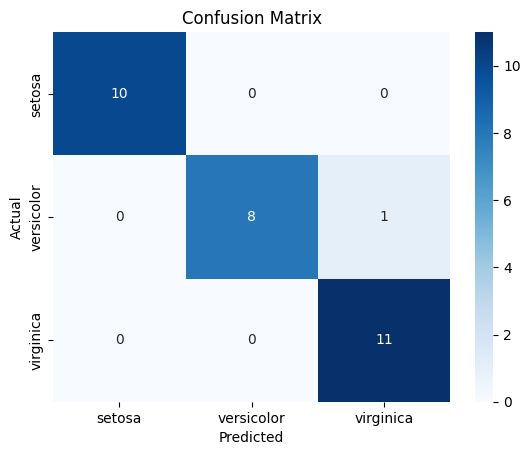

In [27]:
# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [28]:
from sklearn.metrics import classification_report

In [29]:
# Print precision, recall, and f1-score
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [30]:
from sklearn.model_selection import learning_curve


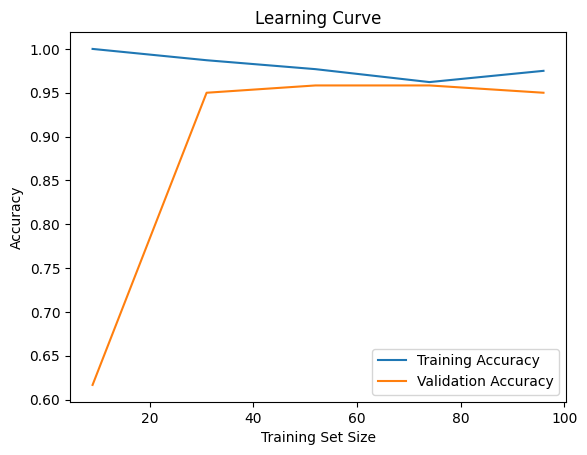

In [31]:
train_sizes, train_scores, val_scores = learning_curve(svm_classifier, X_train_scaled, y_train, cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()